In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
from analyze_feature import analyze_feature

In [7]:
# Setting the style for the plots
sns.set_style("white", {'axes.grid' : False})

In [8]:
# Directory where the plots and PDF file will be saved
save_dir_path = 'output'

In [9]:
# Creating a random DataFrame

num_rows = 50

df = pd.DataFrame({
    'feature_1': np.random.randint(30, 101, size=num_rows),
    'feature_2': np.random.randint(30, 101, size=num_rows)
})

df = df.sort_values(by='feature_1', ascending=False).reset_index(drop=True)

max_os_pfs = 40
df['os_months'] = np.linspace(max_os_pfs, 0, num_rows) + np.random.uniform(0, 40, size=num_rows)
df['pfs_months'] = np.linspace(max_os_pfs, 0, num_rows) + np.random.uniform(0, 40, size=num_rows)
df['os_event'] = df['os_months'].apply(lambda x: int(x < max_os_pfs))
df['pfs_event'] = df['pfs_months'].apply(lambda x: int(x < max_os_pfs))

# outcome = 3 years PFS landmark
pfs_landmark = 36 
df['outcome'] = df.apply(lambda x: np.nan if (x['pfs_months'] < pfs_landmark and x['pfs_event'] == 0) else x['pfs_months'], axis=1)
df['outcome'] = df['pfs_months'].apply(lambda x: x > pfs_landmark if pd.notna(x) else np.nan)

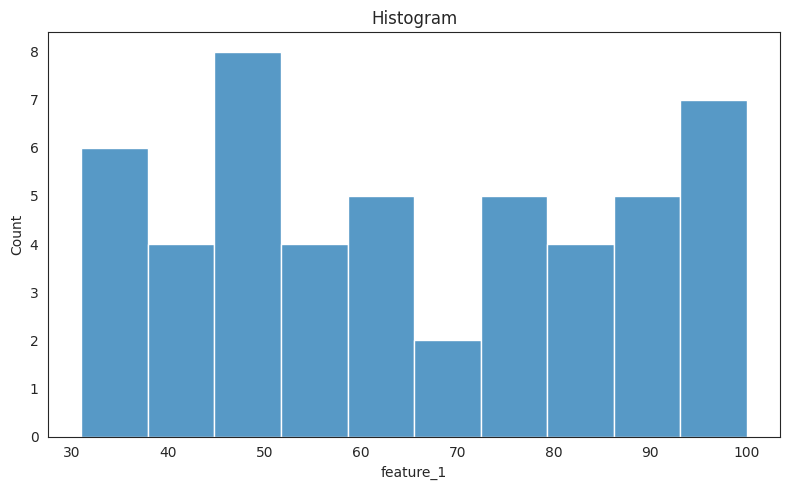

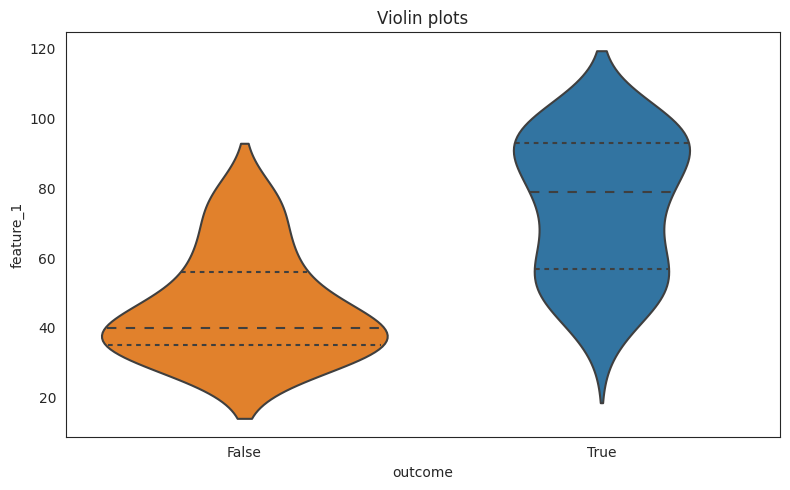

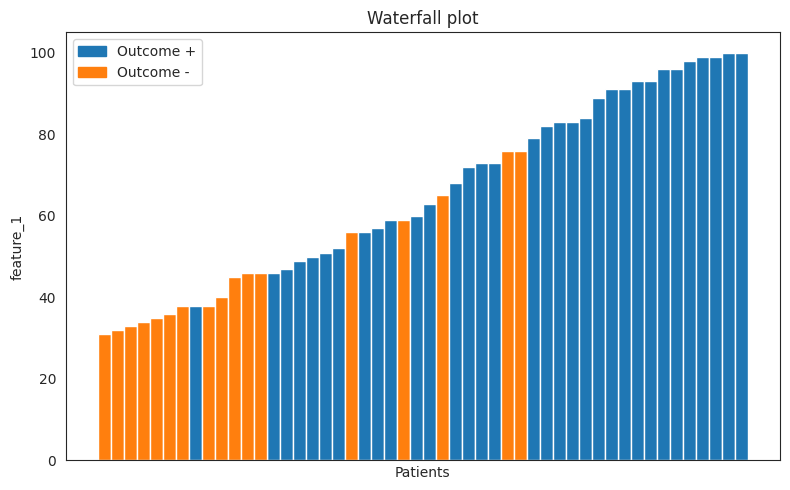

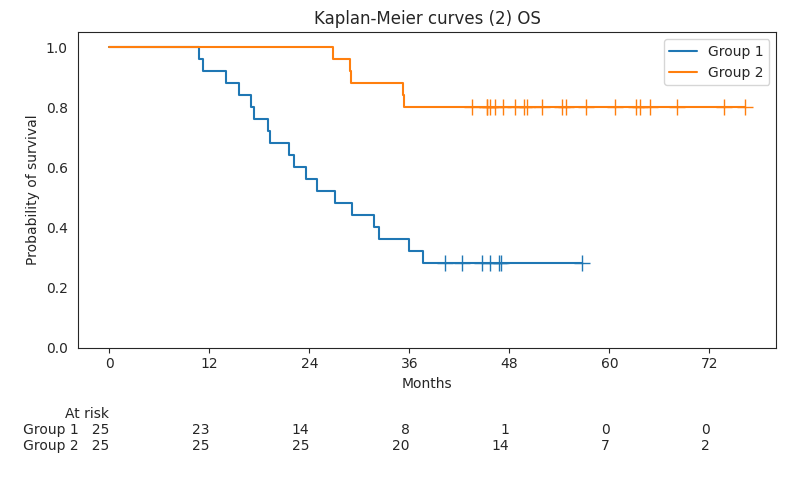

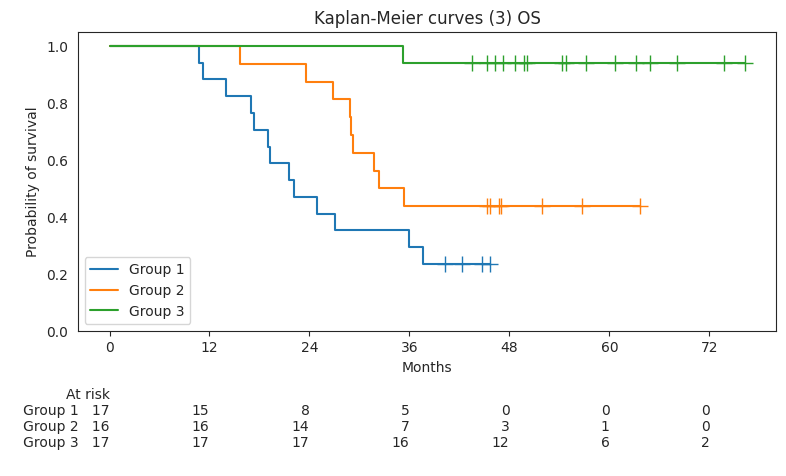

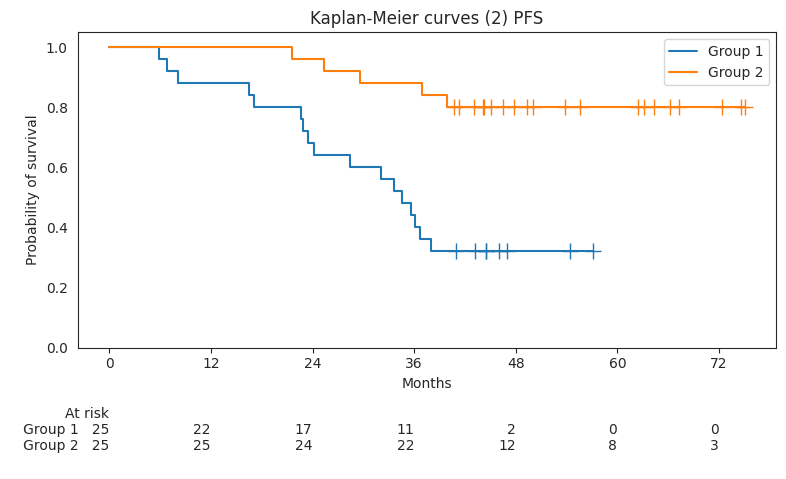

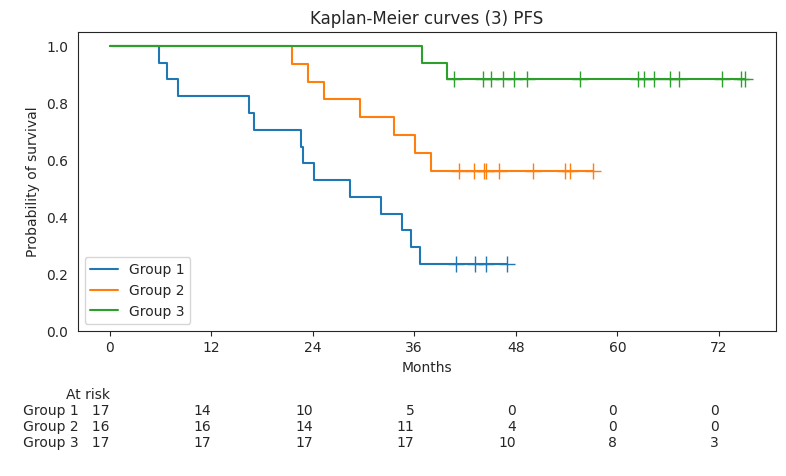

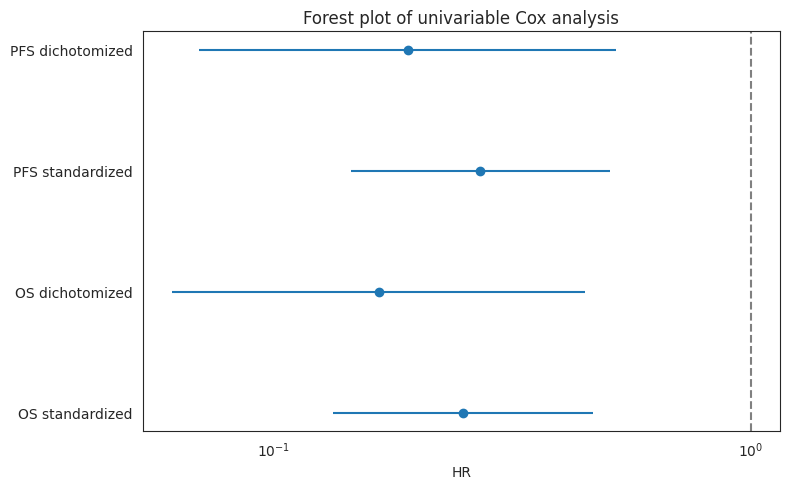

{'Mann-Whitney p-value': 1.2766603921227394e-05, 'Logrank OS p-value': 6.371108609465609e-05, 'Logrank PFS p-value': 0.0003261484849420441, 'Cox OS p-value': 1.3602795603577072e-05, 'Cox OS HR': 0.24968793115419727, 'Cox OS HR CI': (0.13362758975290467, 0.4665508304037038), 'Cox OS assumption p-value': 0.04521525217482881, 'Cox PFS p-value': 4.119827923750159e-05, 'Cox PFS HR': 0.27146077898106225, 'Cox PFS HR CI': (0.14555919878171808, 0.5062610617657546), 'Cox PFS assumption p-value': 0.1625930074749981, 'Cox OS dichotomized p-value': 0.0004159763988613324, 'Cox OS dichotomized HR': 0.1660962923223211, 'Cox OS dichotomized HR CI': (0.06129815502683438, 0.45006213174189014), 'Cox OS dichotomized assumption p-value': 0.1668332466589143, 'Cox PFS dichotomized p-value': 0.0012318817338532377, 'Cox PFS dichotomized HR': 0.1910404894913128, 'Cox PFS dichotomized HR CI': (0.07000038980674769, 0.5213752198500231), 'Cox PFS dichotomized assumption p-value': 0.5291040411203551, 'Logistic regre

In [10]:
analyze_feature(df, 'feature_1', save_dir_path, scaling_method='standardize', outcome='outcome')